In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# load dataset
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [24]:
# Data Preprocessing & EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

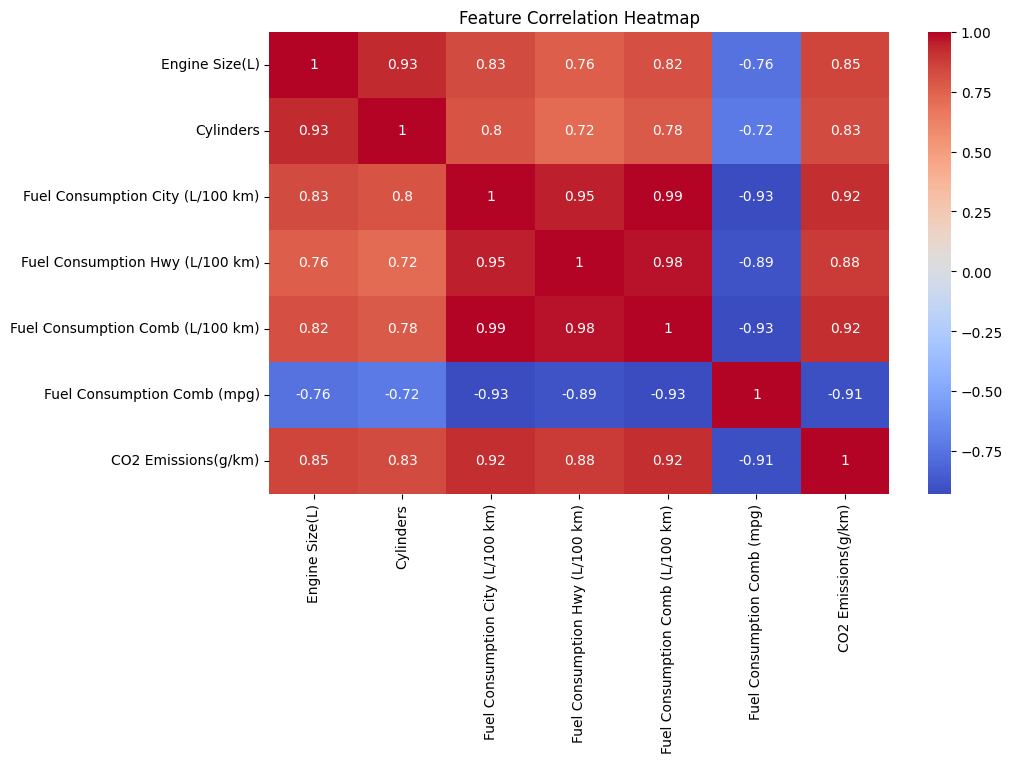

In [25]:
# Assuming 'df' is your DataFrame
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

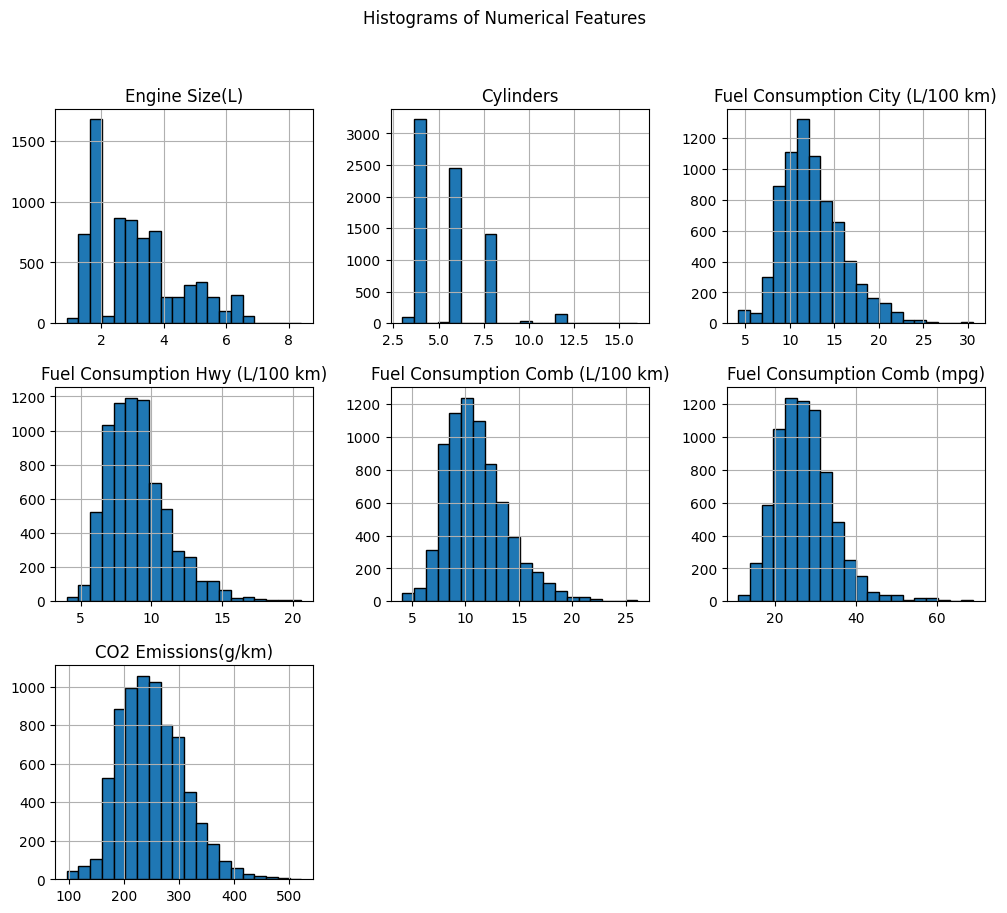

In [26]:
# Histogram for all numerical features
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

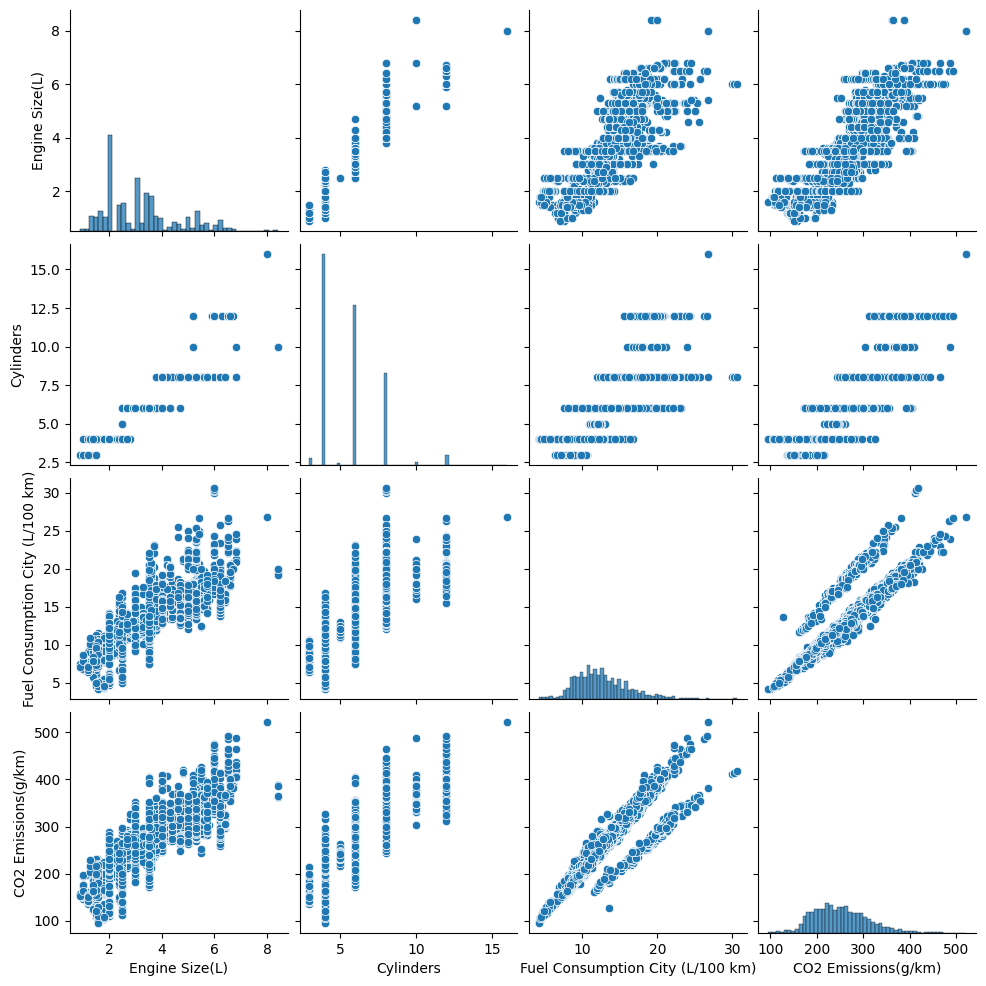

In [27]:
# Pairplot for selected features
selected_features_plot = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']
sns.pairplot(df[selected_features_plot])
plt.show()

In [28]:
# Define Features and target
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)']
target = 'CO2 Emissions(g/km)'

X = df[features]
y = df[target]

In [29]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#  Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept_, self.coef_])

In [33]:
# Model 1: Linear Regression (from scratch)
lr_scratch = LinearRegressionScratch()
lr_scratch.fit(X_train, y_train.values) # Removed .values from X_train
y_pred_lr = lr_scratch.predict(X_test) # Removed .values from X_test

In [34]:
# Model 2: Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [35]:
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R-squared: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression (Scratch)")
evaluate_model(y_test, y_pred_dtr, "Decision Tree Regressor")

Linear Regression (Scratch) - MSE: 337.46, R-squared: 0.90
Decision Tree Regressor - MSE: 139.32, R-squared: 0.96


In [36]:
# Hyperparameter Tuning for Decision Tree
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [37]:
# Cross Validation for Linear Regression (from scratch)
lr_cv_scores = cross_val_score(DecisionTreeRegressor(**grid_search.best_params_, random_state=42), X, y, cv=5)
print("Cross Validation Score for Decision Tree:", np.mean(lr_cv_scores))

Cross Validation Score for Decision Tree: 0.9656738607889543


Best Features Selected: ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Fuel Consumption Comb (mpg)']


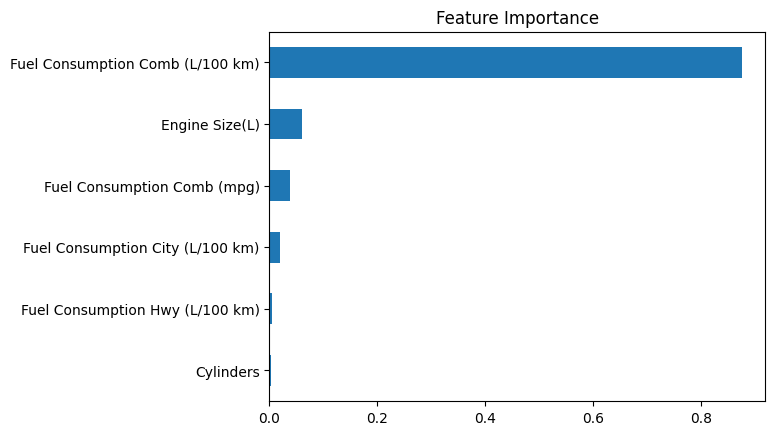

In [38]:
# Feature Selection (Based on importance from Decision Tree)
feature_importances = pd.Series(dtr.feature_importances_, index=features)
selected_features = feature_importances.nlargest(3).index.tolist()
print("Best Features Selected:", selected_features)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [39]:
# Final Model with Optimized Hyperparameters and Best Features
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=features)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=features)

# Ensure selected_features contains valid columns
selected_features = [f for f in selected_features if f in X_train.columns]

# Check if any features are selected
if not selected_features:
    selected_features = X_train.columns.tolist()  # Use all features if selection fails

X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

best_dtr = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
best_dtr.fit(X_train_selected, y_train)
y_pred_best_dtr = best_dtr.predict(X_test_selected)

evaluate_model(y_test, y_pred_best_dtr, "Optimized Decision Tree with Best Features")


Optimized Decision Tree with Best Features - MSE: 127.01, R-squared: 0.96
